In [1]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [4]:
pairs_train.shape

(120000, 2, 28, 28)

In [5]:
labels_train.shape

(120000,)

In [6]:
labels_train

array([1, 0, 1, ..., 0, 1, 0])

1


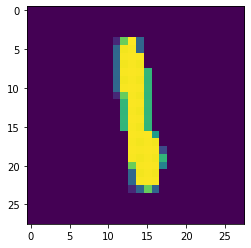

In [7]:
# take a peek at the data
plt.imshow(pairs_train[400,0])
print(labels_train[400])

In [8]:
# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)


In [9]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_1_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_2_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           flatten_1_input[0][0]            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           flatten_2_input[0][0]            
____________________________________________________________________________________________

In [10]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10)

Epoch 1/10
120000/120000 [==============================] - 29s 240us/step - loss: 0.6949 - accuracy: 0.5025
Epoch 2/10
120000/120000 [==============================] - 30s 246us/step - loss: 0.6933 - accuracy: 0.5043
Epoch 3/10
120000/120000 [==============================] - 32s 267us/step - loss: 0.6931 - accuracy: 0.5070
Epoch 4/10
120000/120000 [==============================] - 32s 268us/step - loss: 0.6928 - accuracy: 0.5080
Epoch 5/10
120000/120000 [==============================] - 33s 273us/step - loss: 0.6924 - accuracy: 0.5090
Epoch 6/10
120000/120000 [==============================] - 33s 273us/step - loss: 0.6918 - accuracy: 0.5110
Epoch 7/10
120000/120000 [==============================] - 34s 285us/step - loss: 0.6910 - accuracy: 0.5160
Epoch 8/10
120000/120000 [==============================] - 32s 268us/step - loss: 0.6904 - accuracy: 0.5149
Epoch 9/10
120000/120000 [==============================] - 32s 265us/step - loss: 0.6897 - accuracy: 0.5182
Epoch 10/10
120000/

In [11]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [12]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 256)          0           model_2[1][0]              

In [13]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 28s 229us/step - loss: 0.6941 - accuracy: 0.5056
Epoch 2/10
120000/120000 [==============================] - 28s 231us/step - loss: 0.6932 - accuracy: 0.4981
Epoch 3/10
120000/120000 [==============================] - 28s 236us/step - loss: 0.6930 - accuracy: 0.5048
Epoch 4/10
120000/120000 [==============================] - 28s 230us/step - loss: 0.6929 - accuracy: 0.5032
Epoch 5/10
120000/120000 [==============================] - 28s 233us/step - loss: 0.6928 - accuracy: 0.5050
Epoch 6/10
120000/120000 [==============================] - 28s 234us/step - loss: 0.6925 - accuracy: 0.5044
Epoch 7/10
120000/120000 [==============================] - 28s 237us/step - loss: 0.6923 - accuracy: 0.5115
Epoch 8/10
120000/120000 [==============================] - 28s 235us/step - loss: 0.6920 - accuracy: 0.5103
Epoch 9/10
120000/120000 [==============================] - 28s 234us/step - loss: 0.6918 - accuracy: 0.5105
Epoch 10/10
120000/

In [14]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [15]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_4 (Model)                 (None, 128)          100480      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_4[1][0]              

In [16]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 30s 253us/step - loss: 0.4361 - accuracy: 0.8034
Epoch 2/10
120000/120000 [==============================] - 30s 249us/step - loss: 0.3490 - accuracy: 0.8525
Epoch 3/10
120000/120000 [==============================] - 30s 250us/step - loss: 0.3335 - accuracy: 0.8598
Epoch 4/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3291 - accuracy: 0.8620
Epoch 5/10
120000/120000 [==============================] - 30s 249us/step - loss: 0.3266 - accuracy: 0.8631
Epoch 6/10
120000/120000 [==============================] - 31s 257us/step - loss: 0.3257 - accuracy: 0.8626
Epoch 7/10
120000/120000 [==============================] - 30s 252us/step - loss: 0.3240 - accuracy: 0.8641
Epoch 8/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3230 - accuracy: 0.8643
Epoch 9/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3221 - accuracy: 0.8642
Epoch 10/10
120000/

source:
    https://raw.githubusercontent.com/lukas/ml-class/master/videos/one-shot/